# Logistic Regression Theory

We want to learn about Logistic Regression as a method for **Classification**. 

Some examples of classification problems:
- Spam vs "Ham" emails
- Load default (yes/no)
- Disease diagnosis

Above are all examples of binary classification. 

So far we have only seen regression problems where we try to preedict a continuous value. Although the name may be confusing at first, logistic regression allows us to solve classification problems, where we are trying to predict discrete categories. The convention for binary classification is to have two classes, 0 and 1. 

We cannot use a normal linear regression model on binary groups. It won't lead to a good fit. So we can use a logistic regression curve instead. 

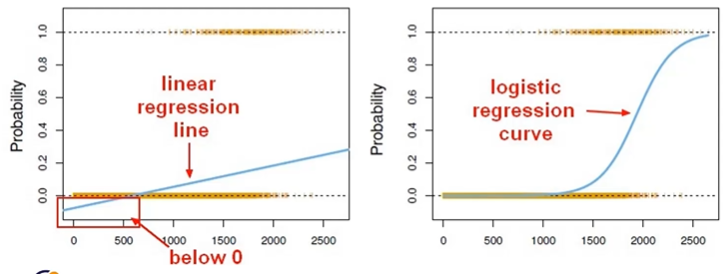

In [4]:
from IPython.display import Image 
Image(filename='LinearVsLogisticCurve.png')

**Sigmoid Function** (aka, Logistic) takes in any value and outputs it to be between 0 and 1

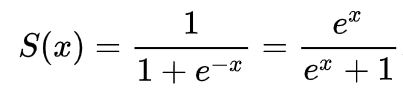

In [5]:
Image(filename='sigmoidfunction.PNG')

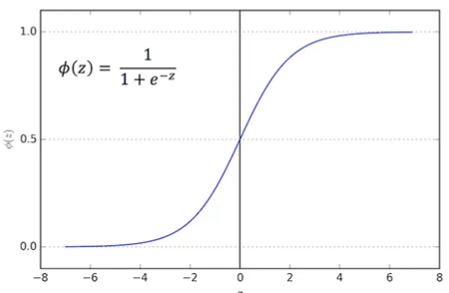

In [6]:
Image(filename='sigmoidfunctionplot.PNG')

No matter the value you enter into the sigmoid function, you are going to get either 0 or 1. This means we can take our Linear Regression Solution and place it into the Sigmoid Function. 

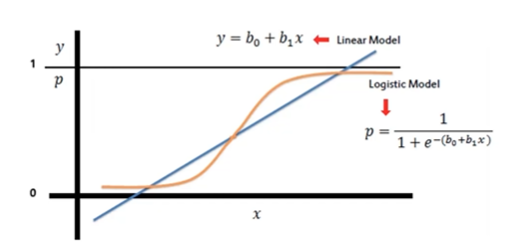

In [7]:
Image(filename='LinearInLogistic.PNG')

This results in a probability from 0 to 1 of belonging to one class. We can set a cutoff point at 0.5, anything below it results in a class 0, anything above is class 1. 

Quick review: We use the logistic function to output a value ranging from 0 to 1. Based off of this probability, we assign a class by putting a cutoff point at 0.5. 

**Model Evaluation**

After you train a logistic regression model on some training data, you will evaluate your model's performance on some test data. You can use a confusion matrix to evaluate classification models. 

For example, imagine testing for disease. 

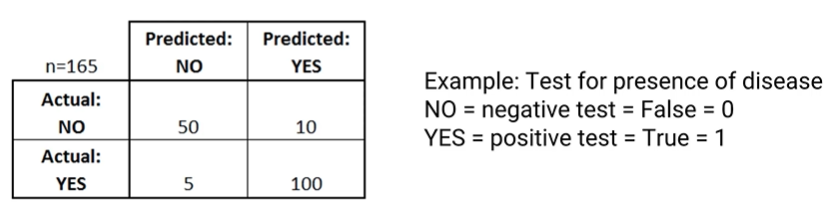

In [8]:
Image(filename='testingDisease.PNG')

In the example, the model predicted that 110 people have the disease, when in reality, 105 people do. 

**Confusion Matrix**

Basic Terminology:
- True Positives (TP): predicted yes, actual yes
- True Negatives (TN): predicted no, actual no
- False Positives (FP): predicted yes, actual no (Type I Error)
- False Negatives (FN): predicted no, actual yes (Type II Error)

This confucsion matrix just has actual numbers, not rates. 

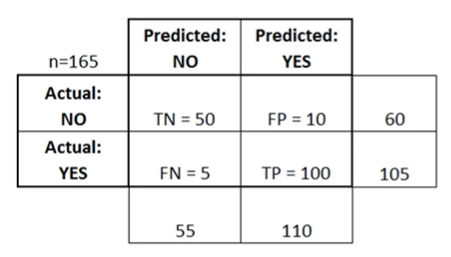

In [9]:
Image(filename='confusionMatrix.PNG')

Now we can talk about rates. 

Accuracy: Overall, how often is is **correct**?

Misclassification Rate (Error Rate): Overall, how often is it **wrong**?

In [10]:
n = 165
TP = 100
TN = 50
FP = 10
FN = 5
actual_no = TN + FP
actual_yes = FN + TP
predicted_no = TN + FN
predicted_yes = FP + TP

accuracy = (TP + TN) / n
print('Accuracy: {:.2f}'.format(accuracy))

error_rate = (FP + FN) / n
print('Error Rate: {:.2f}'.format(error_rate))

Accuracy: 0.91
Error Rate: 0.09


A funny way to remember the difference bewteen Type I (false positive) and Type II (false negative) errors:

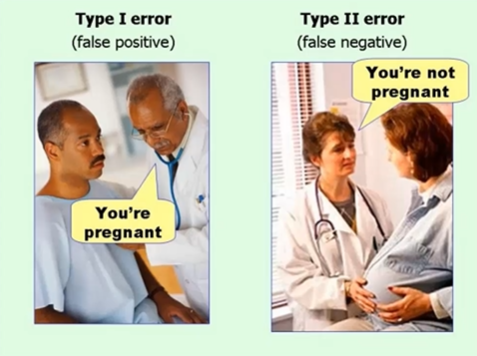

In [11]:
Image(filename='Type 1 vs Type 2 Error.PNG')

# Logistic Regression with Python

Going to be using Titanic data set from Kaggle.com. 

In [12]:
import pandas as pd
import numpy as np

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
train = pd.read_csv('titanic_train.csv')

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Often you are going to be missing data. We are going to create a heatmap using seaborn to see where we are missing data. 

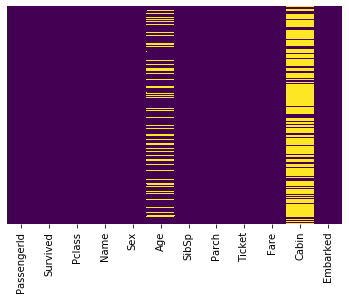

In [16]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We have created a heat map of the true/false values. Because of the coloring, the yellow indicates values that are NaN or Null. 

Even though a decent chunk of the age data is missing, we might be able to make reasonable estimates based on knowledge in the data. 

In [17]:
sns.set_style('whitegrid')

We are going to do more data exploration. 

First thing we want to do is count how many survived and how many didn't. 

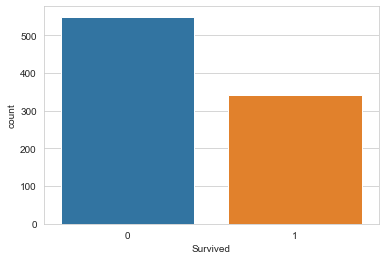

In [18]:
sns.countplot(x='Survived', data=train)

We can also break this down by sex quite easily. 

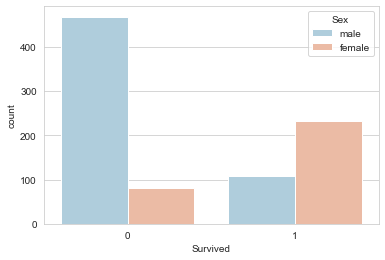

In [19]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

Let's change the hue to passenger class

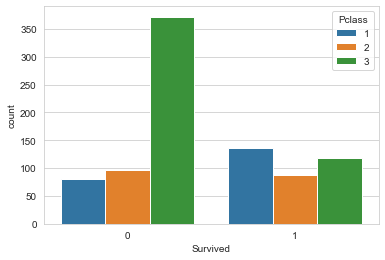

In [20]:
sns.countplot(x='Survived', data=train, hue='Pclass')

Lets get an idea of the age of the people on the titanic. 

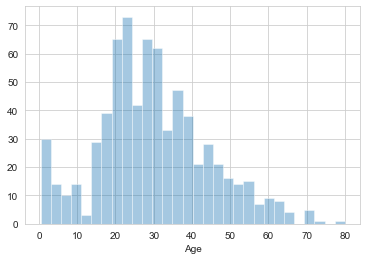

In [21]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

Let's explore the number of siblings and spouses

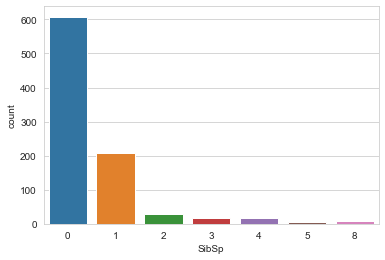

In [22]:
sns.countplot(x='SibSp', data=train)

Let's look at how much people paid

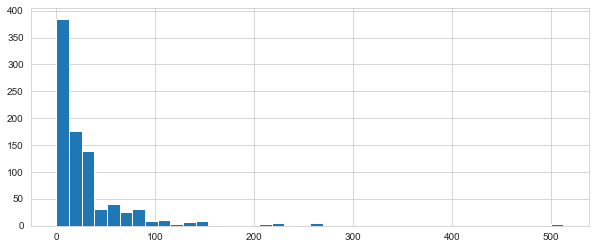

In [23]:
train['Fare'].hist(bins=40, figsize=(10,4))

Let's see how we could have made this plot with cufflinks to interact with the data

In [24]:
import cufflinks as cf

In [25]:
cf.go_offline()

In [26]:
#train['Fare'].iplot(kind='hist', bins=30)

# Logistic Regression with Python 2

We now want to switch gears to clean our data so that they re in n cceptable format for our machine learning algorithms.

We want to fill in the missing age data rather than dropping it entirely. One way to do this is by filling in the mean age of all the passengers. This is known as imputation - taking the average age and filling in missing data. We can be smarter than this and check the average age by passenger class. 

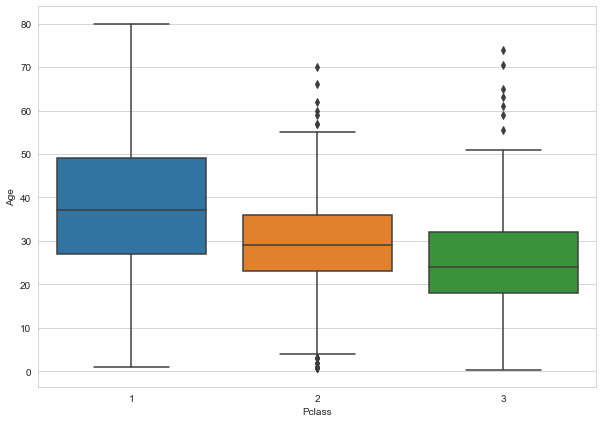

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [28]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age    

In [32]:
# train[['Age', 'Pclass']] return a dataframe with only the two columns named 
# in the order in which we have identified them (see below). 
# the apply() method takes in the function to apply to each column or row
# axis = 1 applies the function on each row (across the columns)
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train[['Age', 'Pclass']].head()

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


After running the function, we have successfully filled in all of the missing ages values. We can confirm this by checking the heat map again. 

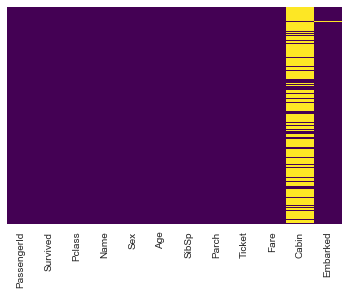

In [34]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now the cabin column. There might be something you might want to do with it, such as asking 'Did we know their cabin number?' and putting a zero or one. However, there is so much missing data that it it probably best to drop the column. 

In [35]:
train.drop('Cabin', axis=1, inplace=True)

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


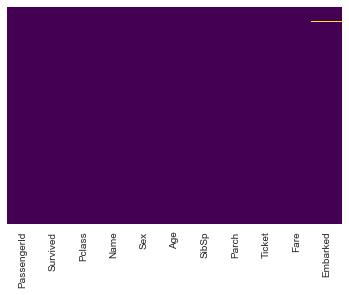

In [37]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now we only have one or two missing values in the 'Embarked' column, and we are going to drop those. 

In [38]:
train.dropna(inplace=True)

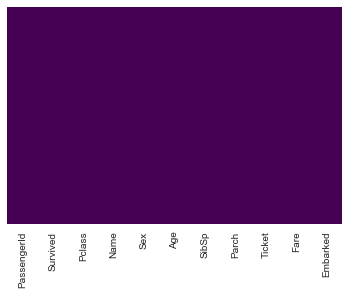

In [39]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now everything is one solid color with no missing data. 

We have successfully taken care of the first step of cleaning data, which is handling missing values. Now we need to deal with categorical features. We need to convert them to 'dummy variables', otherwise our machine learning algorithms won't be able to use them as inputs. 

For example, the sex column contains 'male' and 'female'. The machine learning algorithms cannot interpret these items, so we will have to create a new column with 0's and 1's indicating if someone is male (or female) or not. 

If we just do this:

In [40]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


We get one column that is a perfect predictor of the other column. This is an issue known as multi-colinearity and mess up the algorithms. So we can drop the first. 

In [41]:
pd.get_dummies(train['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [42]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [43]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [44]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [45]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


We are going to use concatenation to add these columns to our dataframe

In [46]:
train = pd.concat([train, sex, embark], axis=1)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


We can continue cleaning up the data by getting rid of columns that we don't need anymore. We don't need the Sex or Embarked columns because they are encoded by our dummy variables. We also cannot really use the Name or the Ticket columns because there isn't too much information we can possibly use.

In [48]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


This is ready for a machine learning algorithm because it is all together and all numerical. The PassengerId column though is effectively an index for the passengers, and doesn't really provide much information for us, so we are going to drop that as well. 

In [50]:
train.drop('PassengerId', axis=1, inplace=True)

In [51]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Notice that the Pclass column can only have three values, so technically it can be treated as categorical data. So we could also get dummy variables for it as well, but we will do that in a later exercise. We will get to learn how a machine learning algorithm behaves differently when the data is treated differently. 

# Logistic Regression with Python Part 3

Notice in our files that we have titanic_train and titanic_test csv files. We are going to treat our current train dataframe as the entiriety of the data, and we will walk through the train/test split procedure. 

In [52]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [73]:
# create an instance of a logistic regression model
logmodel = LogisticRegression(max_iter=1000)

In [74]:
# train the model
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
predictions = logmodel.predict(X_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)